In [1]:
import numpy as np

x0=0
h=0.05
x_values = np.arange(x0, 1+h, h)
x = [round(i,5) for i in x_values.tolist()]

#np.array(x)
y=-np.array(x) **4/2 + 4*np.array(x) **3 - 10*np.array(x) **2 + 17*np.array(x)/2+1
y_rounded = np.round(y, 5)
y = y_rounded.tolist()

print("x = np.array(",x,end='')
print(')')
print("y = np.array(",y,end='')
print(')')

x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0])


S0(0.0< x<=0.05) = 1.00000 + 8.21147(x-0.0) + 0.00000(x-0.0)^2  + -80.58768(x-0.0)^3
S1(0.05< x<=0.1) = 1.40050 + 7.60706(x-0.05) + -12.08815(x-0.05)^2  + 26.53841(x-0.05)^3
S2(0.1< x<=0.15) = 1.75395 + 6.59728(x-0.1) + -8.10739(x-0.1)^2  + -2.36594(x-0.1)^3
S3(0.15< x<=0.2) = 2.06325 + 5.76880(x-0.15) + -8.46228(x-0.15)^2  + 5.32536(x-0.15)^3
S4(0.2< x<=0.25) = 2.33120 + 4.96251(x-0.2) + -7.66348(x-0.2)^2  + 3.06448(x-0.2)^3
S5(0.25< x<=0.3) = 2.56055 + 4.21915(x-0.25) + -7.20381(x-0.25)^2  + 3.61670(x-0.25)^3
S6(0.3< x<=0.35) = 2.75395 + 3.52589(x-0.3) + -6.66130(x-0.3)^2  + 3.26873(x-0.3)^3
S7(0.35< x<=0.4) = 2.91400 + 2.88428(x-0.35) + -6.17099(x-0.35)^2  + 3.30838(x-0.35)^3
S8(0.4< x<=0.45) = 3.04320 + 2.29199(x-0.4) + -5.67473(x-0.4)^2  + 3.09775(x-0.4)^3
S9(0.45< x<=0.5) = 3.14400 + 1.74775(x-0.45) + -5.21007(x-0.45)^2  + 3.10062(x-0.45)^3
S10(0.5< x<=0.55) = 3.21875 + 1.25000(x-0.5) + -4.74498(x-0.5)^2  + 2.89978(x-0.5)^3
S11(0.55< x<=0.6) = 3.26975 + 0.79725(x-0.55) + -4.31001

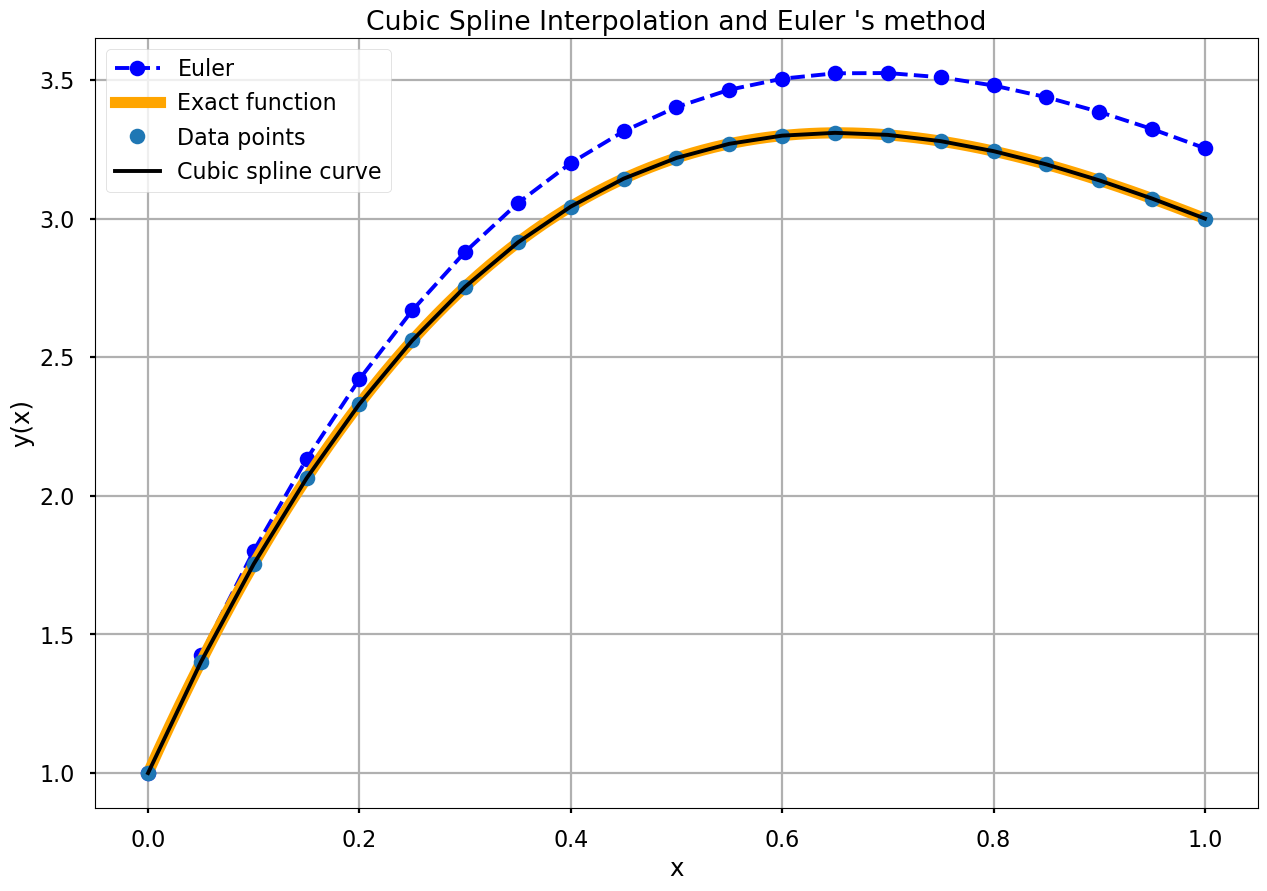

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0])

def z(a):
    return -a **4/2 + 4*a **3 - 10*a **2 + 17*a /2+1

cs = CubicSpline(x, y, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    x_low = x[j]
    x_high = x[j+1]
    
    equation = f'S{j}({x_low}< x<={x_high}) = {a_j:.5f} + {b_j:.5f}(x-{x_low}) + {c_j:.5f}(x-{x_low})^2  + {d_j:.5f}(x-{x_low})^3'
   
    print(equation)

x_plot = np.linspace(x[0], x[-1], 100)

y_exact = -x_plot **4/2 + 4*x_plot **3 - 10*x_plot **2 + 17*x_plot /2+1


def func( x_euler, y_euler ):
    return -2*x_euler**3+12*x_euler**2-20*x_euler+8.5
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    print("Euler y(1)= ","%.5f"% y_euler)
    return y_euler

a0 = 0
b0 = 1
h = 0.05
 
x_euler = 1
 
y_euler = euler(a0, b0, h, x_euler)

error = abs(z(1) - y_euler)
print("Error Euler = ", "%.5f" % error)

print('y(x)_exact={:.5f}'.format(z(1)))
print('y(1) Cubic Spline = {:.5f}'.format(cs(1)))
print('Error Cubic Spline={:.5f}'.format(abs(z(1)-cs(1))))

plt.style.use('seaborn-poster')
%matplotlib inline


f = lambda t, s: -2*t**3+12*t**2-20*t+8.5
h = 0.05 
t = np.arange(0, 1 + h, h) 

s0 = 1 

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (15, 10))
plt.plot(t, s, 'bo--', label='Euler')
plt.title('Cubic Spline Interpolation and Euler \'s method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.plot(x_plot,y_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(x, y, 'o', label='Data points')
plt.plot(x, cs(x), 'black',label='Cubic spline curve')
plt.legend()
plt.show()

In [39]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( x_euler, y_euler ):
    return -2*x_euler**3+12*x_euler**2-20*x_euler+8.5
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    return y_euler

a0 = 0
b0 = 1
h = 0.05
 
x_euler_values = np.arange(0, 1+h, h)

x_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(a):
    return -a **4/2 + 4*a **3 - 10*a **2 + 17*a /2+1



x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0])


cs = CubicSpline(x, y, bc_type='natural')

for i in np.arange(0, 1+h, h):
    
    error = abs(z(i)-cs(i))
    error_values.append(float("{:.5f}".format(error)))

for x in x_euler_values:
    y_euler = euler(a0, b0, h, x)
    error = abs(z(x) - y_euler)
    s = np.round(cs(x), 5)
    error_cs.append(abs(z(x)-s))
    x_values.append(x)
    euler_values.append(float("{:.5f}".format(y_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))


x_values = [float("{:.5f}".format(x)) for x in x_values]
exact_values = [float("{:.5f}".format(x)) for x in exact_values]
euler_values = [float("{:.5f}".format(x)) for x in euler_values]
error_euler = [float("{:.5f}".format(x)) for x in error_euler]
s_values = [float("{:.5f}".format(x)) for x in s_values]
error_cs = [float("{:.5f}".format(x)) for x in error_cs]

print('{',end='')   
print("'x' : ", x_values,end='')
print(',')

error_eulervalues=[]


for x in x_euler_values:
    exact_values.append(round(z(x),5))
    


print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')



for x_euler in x_euler_values:
    x_values.append(round(x_euler, 5))
    y_euler = euler(a0, b0, h, x_euler)
    erroreuler = abs(z(x_euler) - y_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')




for x in x_euler_values:
    s = np.round(cs(x), 5)
    s_values.append(float("{:.5f}".format(s)))

s_values = [float("{:.5f}".format(x)) for x in s_values]
error_cs = [float("{:.5f}".format(x)) for x in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'x' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0],
'Euler' :  [1.0, 1.425, 1.80149, 2.13239, 2.42055, 2.66875, 3.05599, 3.2002, 3.3148, 3.40219, 3.46469, 3.50455, 3.52395, 3.52395, 3.52499, 3.50969, 3.48, 3.4378, 3.38489, 3.32299, 3.25375],
'Cubic Spline':  [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0],
'Error Euler':  [0.0, 0.0245, 0.04754, 0.06914, 0.08935, 0.1082, 0.30204, 0.2862, 0.2716, 0.25819, 0.24594, 0.2348, 0.22475, 0.2147, 0.22304, 0.23039, 0.2368, 0.2423, 0.24694, 0.25074, 0.25375],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [40]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict ={'x' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0],
'Euler' :  [1.0, 1.425, 1.80149, 2.13239, 2.42055, 2.66875, 3.05599, 3.2002, 3.3148, 3.40219, 3.46469, 3.50455, 3.52395, 3.52395, 3.52499, 3.50969, 3.48, 3.4378, 3.38489, 3.32299, 3.25375],
'Cubic Spline':  [1.0, 1.4005, 1.75395, 2.06325, 2.3312, 2.56055, 2.75395, 2.914, 3.0432, 3.144, 3.21875, 3.26975, 3.2992, 3.30925, 3.30195, 3.2793, 3.2432, 3.1955, 3.13795, 3.07225, 3.0],
'Error Euler':  [0.0, 0.0245, 0.04754, 0.06914, 0.08935, 0.1082, 0.30204, 0.2862, 0.2716, 0.25819, 0.24594, 0.2348, 0.22475, 0.2147, 0.22304, 0.23039, 0.2368, 0.2423, 0.24694, 0.25074, 0.25375],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

,x,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.00,1.00000,1.00000,1.00000,0.00000,0.0
1,0.05,1.40050,1.42500,1.40050,0.02450,0.0
2,0.10,1.75395,1.80149,1.75395,0.04754,0.0
3,0.15,2.06325,2.13239,2.06325,0.06914,0.0
4,0.20,2.33120,2.42055,2.33120,0.08935,0.0
5,0.25,2.56055,2.66875,2.56055,0.10820,0.0
6,0.30,2.75395,3.05599,2.75395,0.30204,0.0
7,0.35,2.91400,3.20020,2.91400,0.28620,0.0
8,0.40,3.04320,3.31480,3.04320,0.27160,0.0
9,0.45,3.14400,3.40219,3.14400,0.25819,0.0


In [4]:
import numpy as np

x0=0
h=0.05
x_values = np.arange(x0, 1+h, h)
x = [round(i,5) for i in x_values.tolist()]


y=(np.exp(2*np.array(x))*(np.array(x)-1)+3*np.array(x)+3)/(np.exp(2*np.array(x))+3)
y_rounded = np.round(y, 5)
y = y_rounded.tolist()

print("x = np.array(",x,end='')
print(')')
print("y = np.array(",y,end='')
print(')')

x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753])


S0(0.0< x<=0.05) = 0.50000 + 0.23912(x-0.0) + 0.00000(x-0.0)^2  + -3.08797(x-0.0)^3
S1(0.05< x<=0.1) = 0.51157 + 0.21596(x-0.05) + -0.46320(x-0.05)^2  + 0.95986(x-0.05)^3
S2(0.1< x<=0.15) = 0.52133 + 0.17684(x-0.1) + -0.31922(x-0.1)^2  + -0.11147(x-0.1)^3
S3(0.15< x<=0.2) = 0.52936 + 0.14408(x-0.15) + -0.33594(x-0.15)^2  + 0.28602(x-0.15)^3
S4(0.2< x<=0.25) = 0.53576 + 0.11263(x-0.2) + -0.29303(x-0.2)^2  + 0.16741(x-0.2)^3
S5(0.25< x<=0.3) = 0.54068 + 0.08459(x-0.25) + -0.26792(x-0.25)^2  + 0.24435(x-0.25)^3
S6(0.3< x<=0.35) = 0.54427 + 0.05963(x-0.3) + -0.23127(x-0.3)^2  + 0.29519(x-0.3)^3
S7(0.35< x<=0.4) = 0.54671 + 0.03871(x-0.35) + -0.18699(x-0.35)^2  + 0.25490(x-0.35)^3
S8(0.4< x<=0.45) = 0.54821 + 0.02192(x-0.4) + -0.14876(x-0.4)^2  + 0.36522(x-0.4)^3
S9(0.45< x<=0.5) = 0.54898 + 0.00979(x-0.45) + -0.09398(x-0.45)^2  + 0.28422(x-0.45)^3
S10(0.5< x<=0.55) = 0.54927 + 0.00252(x-0.5) + -0.05134(x-0.5)^2  + 0.33789(x-0.5)^3
S11(0.55< x<=0.6) = 0.54931 + -0.00008(x-0.55) + -0.00066(x

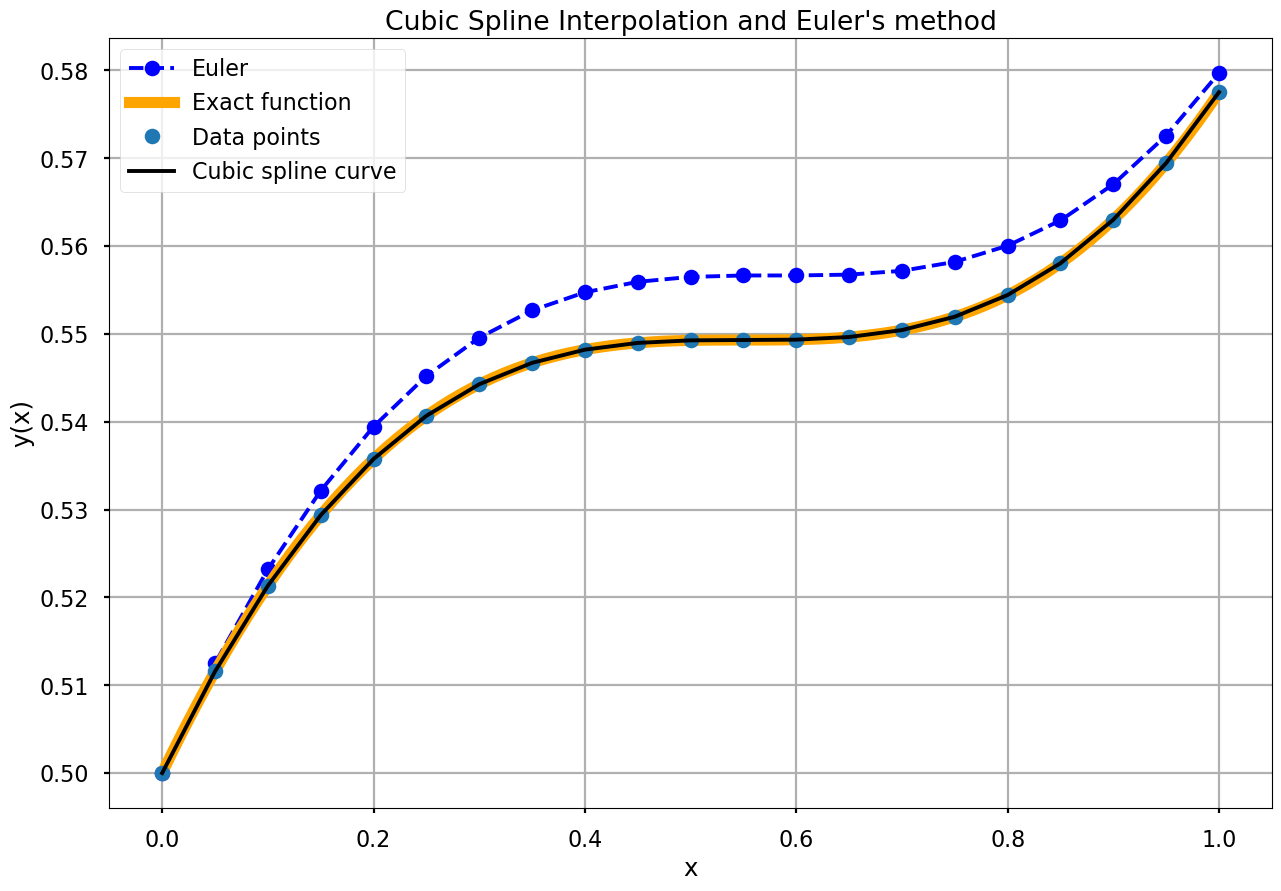

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753])
def z(a):
    return (np.exp(2*a)*(a-1)+3*a+3)/(np.exp(2*a)+3)

cs = CubicSpline(x, y, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    x_low = x[j]
    x_high = x[j+1]
    
    equation = f'S{j}({x_low}< x<={x_high}) = {a_j:.5f} + {b_j:.5f}(x-{x_low}) + {c_j:.5f}(x-{x_low})^2  + {d_j:.5f}(x-{x_low})^3'
    
    print(equation)

x_plot = np.linspace(x[0], x[-1], 100)

y_exact = (np.exp(2*x_plot)*(x_plot-1)+3*x_plot+3)/(np.exp(2*x_plot)+3)


import numpy as np

def func( x_euler, y_euler ):
    return (x_euler-y_euler)**2
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    print("Euler y(1)= ","%.5f"% y_euler)
    return y_euler

a0 = 0
b0 = 0.5
h = 0.05
 

x_euler = 1
 
y_euler = euler(a0, b0, h, x_euler)

error = abs(z(1) - y_euler)
print("Error Euler = ", "%.5f" % error)

print('y(x)_exact={:.5f}'.format(z(1)))
print('y(1) Cubic Spline = {:.5f}'.format(cs(1)))
print('Error Cubic Spline={:.5f}'.format(abs(z(1)-cs(1))))


plt.style.use('seaborn-poster')
%matplotlib inline


f = lambda t, s: (t-s)**2 
h = 0.05 
t = np.arange(0, 1 + h, h) 

s0 = 0.5 


s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (15, 10))
plt.plot(t, s, 'bo--', label='Euler')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.plot(x_plot,y_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(x, y, 'o', label='Data points')
plt.plot(x, cs(x), 'black',label='Cubic spline curve')
plt.legend()
plt.show()

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( x_euler, y_euler ):
    return (x_euler-y_euler)**2
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    return y_euler

a0 = 0
b0 = 0.5
h = 0.05
 
x_euler_values = np.arange(0, 1+h, h)

x_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(a):
    return (np.exp(2*a)*(a-1)+3*a+3)/(np.exp(2*a)+3)



x = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
y = np.array( [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753])


cs = CubicSpline(x, y, bc_type='natural')


for i in np.arange(0, 1+h, h):
    error = abs(z(i)-cs(i))
    error_values.append(float("{:.5f}".format(error)))

for x in x_euler_values:
    y_euler = euler(a0, b0, h, x)
    error = abs(z(x) - y_euler)
    s = np.round(cs(x), 5)
    error_cs.append(abs(z(x)-s))
    x_values.append(x)
    euler_values.append(float("{:.5f}".format(y_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))



x_values = [float("{:.5f}".format(x)) for x in x_values]
exact_values = [float("{:.5f}".format(x)) for x in exact_values]
euler_values = [float("{:.5f}".format(x)) for x in euler_values]
error_euler = [float("{:.5f}".format(x)) for x in error_euler]
s_values = [float("{:.5f}".format(x)) for x in s_values]

print('{',end='')   
print("'x' : ", x_values,end='')
print(',')

error_eulervalues=[]


for x in x_euler_values:
    exact_values.append(round(z(x),5))
    


print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')



for x_euler in x_euler_values:
    x_values.append(round(x_euler, 5))
    y_euler = euler(a0, b0, h, x_euler)
    erroreuler = abs(z(x_euler) - y_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')




for x in x_euler_values:
    s = np.round(cs(x), 5)
    s_values.append(float("{:.5f}".format(s)))


s_values = [float("{:.5f}".format(x)) for x in s_values]
error_cs = [float("{:.5f}".format(x)) for x in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'x' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753],
'Euler' :  [0.5, 0.5125, 0.5232, 0.53215, 0.53945, 0.54521, 0.55269, 0.55474, 0.55594, 0.5565, 0.55666, 0.55666, 0.55675, 0.55675, 0.55719, 0.55821, 0.56005, 0.56293, 0.56705, 0.57259, 0.57971],
'Cubic Spline':  [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753],
'Error Euler':  [0.0, 0.00093, 0.00187, 0.00279, 0.00369, 0.00454, 0.00842, 0.00803, 0.00773, 0.00752, 0.00739, 0.00735, 0.0074, 0.00711, 0.00675, 0.00625, 0.00562, 0.00487, 0.00404, 0.00313, 0.00218],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [4]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'x' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753],
'Euler' :  [0.5, 0.5125, 0.5232, 0.53215, 0.53945, 0.54521, 0.55269, 0.55474, 0.55594, 0.5565, 0.55666, 0.55666, 0.55675, 0.55675, 0.55719, 0.55821, 0.56005, 0.56293, 0.56705, 0.57259, 0.57971],
'Cubic Spline':  [0.5, 0.51157, 0.52133, 0.52936, 0.53576, 0.54068, 0.54427, 0.54671, 0.54821, 0.54898, 0.54927, 0.54931, 0.54935, 0.54965, 0.55044, 0.55196, 0.55443, 0.55805, 0.56301, 0.56946, 0.57753],
'Error Euler':  [0.0, 0.00093, 0.00187, 0.00279, 0.00369, 0.00454, 0.00842, 0.00803, 0.00773, 0.00752, 0.00739, 0.00735, 0.0074, 0.00711, 0.00675, 0.00625, 0.00562, 0.00487, 0.00404, 0.00313, 0.00218],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

,x,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.00,0.50000,0.50000,0.50000,0.00000,0.0
1,0.05,0.51157,0.51250,0.51157,0.00093,0.0
2,0.10,0.52133,0.52320,0.52133,0.00187,0.0
3,0.15,0.52936,0.53215,0.52936,0.00279,0.0
4,0.20,0.53576,0.53945,0.53576,0.00369,0.0
5,0.25,0.54068,0.54521,0.54068,0.00454,0.0
6,0.30,0.54427,0.55269,0.54427,0.00842,0.0
7,0.35,0.54671,0.55474,0.54671,0.00803,0.0
8,0.40,0.54821,0.55594,0.54821,0.00773,0.0
9,0.45,0.54898,0.55650,0.54898,0.00752,0.0


In [2]:
import numpy as np

t0=0
h=0.05
t_values = np.arange(t0, 1+h, h)
t = [round(i,5) for i in t_values.tolist()]

#np.array(x)
x=(((2/3)*np.cos(8*np.array(t)))-((1/6)*np.sin(8*np.array(t))))
x_rounded = np.round(x, 5)
x = x_rounded.tolist()

print("t = np.array(",t,end='')
print(')')
print("x = np.array(",x,end='')
print(')')


t = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
x = np.array( [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189])


S0(0.0< t<=0.05) = 0.66667 + -1.94078(t-0.0) + 0.00000(t-0.0)^2  + -164.64819(t-0.0)^3
S1(0.05< t<=0.1) = 0.54905 + -3.17564(t-0.05) + -24.69723(t-0.05)^2  + 106.04097(t-0.05)^3
S2(0.1< t<=0.15) = 0.34178 + -4.85006(t-0.1) + -8.79108(t-0.1)^2  + 43.60430(t-0.1)^3
S3(0.15< t<=0.2) = 0.08275 + -5.40213(t-0.15) + -2.25044(t-0.15)^2  + 54.90183(t-0.15)^3
S4(0.2< t<=0.25) = -0.18612 + -5.21541(t-0.2) + 5.98484(t-0.2)^2  + 45.10837(t-0.2)^3
S5(0.25< t<=0.3) = -0.42629 + -4.27862(t-0.25) + 12.75109(t-0.25)^2  + 45.70468(t-0.25)^3
S6(0.3< t<=0.35) = -0.60263 + -2.66072(t-0.3) + 19.60679(t-0.3)^2  + 24.63290(t-0.3)^3
S7(0.35< t<=0.4) = -0.68357 + -0.51530(t-0.35) + 23.30173(t-0.35)^2  + -19.27627(t-0.35)^3
S8(0.4< t<=0.45) = -0.65349 + 1.67031(t-0.4) + 20.41029(t-0.4)^2  + -26.40780(t-0.4)^3
S9(0.45< t<=0.5) = -0.52225 + 3.51328(t-0.45) + 16.44912(t-0.45)^2  + -40.85253(t-0.45)^3
S10(0.5< t<=0.55) = -0.31057 + 4.85179(t-0.5) + 10.32124(t-0.5)^2  + -51.94208(t-0.5)^3
S11(0.55< t<=0.6) = -0.04867

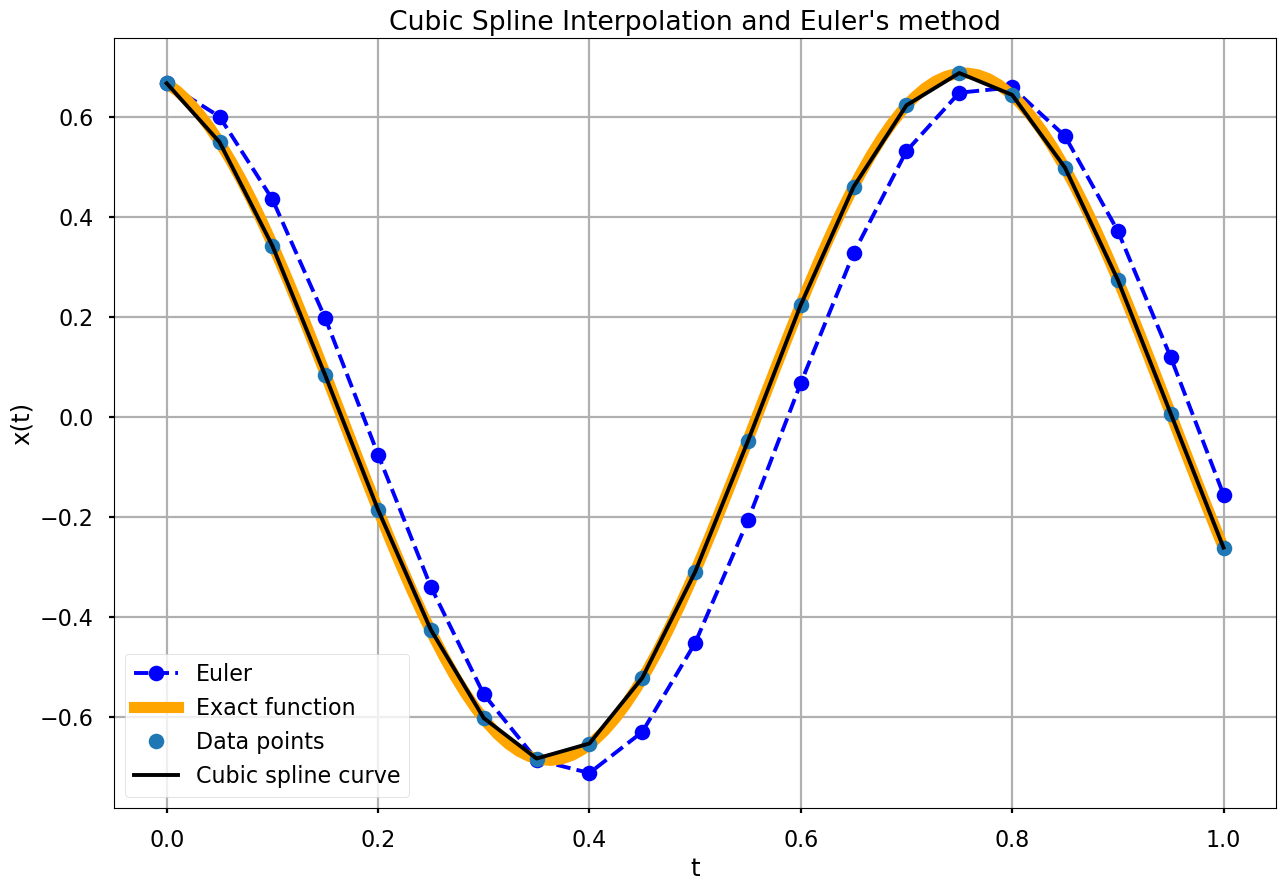

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

t = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
x = np.array( [0.66667, 0.54905, 0.34178, 0.08275, -0.18612, -0.42629, -0.60263, -0.68357, -0.65349, -0.52225, -0.31057, -0.04867, 0.22373, 0.45969, 0.6226, 0.68715, 0.64348, 0.49801, 0.27342, 0.00629, -0.26179])
def z(a):
    return (((2/3)*np.cos(8*a))-((1/6)*np.sin(8*a)))

cs = CubicSpline(t, x, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    t_low = t[j]
    t_high = t[j+1]
    
    equation = f'S{j}({t_low}< t<={t_high}) = {a_j:.5f} + {b_j:.5f}(t-{t_low}) + {c_j:.5f}(t-{t_low})^2  + {d_j:.5f}(t-{t_low})^3'
    
    print(equation)

t_plot = np.linspace(t[0], t[-1], 100)

x_exact = (((2/3)*np.cos(8*t_plot))-((1/6)*np.sin(8*t_plot)))

 
def func( t_euler, x_euler ):
    return (-4/3)*(4*(np.sin(8*t_euler))+np.cos(8*x_euler))
     

def euler( a0, x_euler, h, t_euler ):
    temp = -0
 

    while a0 < t_euler:
        temp = x_euler
        x_euler =x_euler + h * func(a0, x_euler)
        a0 = a0 + h
 

    print("Euler x(1)= ","%.5f"% x_euler)
    return x_euler

a0 = 0
b0 = 2/3
h = 0.05
 
t_euler = 1
 
x_euler = euler(a0, b0, h, t_euler)

error = abs(z(1) - x_euler)
print("Error Euler = ", "%.5f" % error)

print('x(t)_exact={:.5f}'.format(z(1)))
print('x(1) Cubic Spline = {:.5f}'.format(cs(1)))
print('Error Cubic Spline={:.5f}'.format(abs(z(1)-cs(1))))


plt.style.use('seaborn-poster')



f = lambda t, s: (-4/3)*(4*(np.sin(8*t))+np.cos(8*t)) 
h = 0.05 
t = np.arange(0, 1 + h, h) 


s0 = 2/3 

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (15, 10))
plt.plot(t, s, 'bo--', label='Euler')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.plot(t_plot,x_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(t, x, 'o', label='Data points')
plt.plot(t, cs(t), 'black',label='Cubic spline curve')
plt.legend()
plt.show()

In [8]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( t_euler, x_euler ):
    return (-4/3)*(4*(np.sin(8*t_euler))+np.cos(8*x_euler))
     

def euler( a0, x_euler, h, t_euler ):
    temp = -0
 

    while a0 < t_euler:
        temp = x_euler
        x_euler =x_euler + h * func(a0, x_euler)
        a0 = a0 + h
 

    
    return x_euler

a0 = 0
b0 = 2/3
h = 0.05
 
t_euler_values = np.arange(0, 1+h, h)

t_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(a):
    return (((2/3)*np.cos(8*a))-((1/6)*np.sin(8*a)))



t = np.array( [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
x = np.array( [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189])


cs = CubicSpline(t, x, bc_type='natural')


for i in np.arange(0, 1+h, h):
    error = abs(z(i)-cs(i))

for t in t_euler_values:
    x_euler = euler(a0, b0, h, t)
    error = abs(z(t) - x_euler)
    s = np.round(cs(t), 5)
    error_cs.append(abs(z(t)-s))
    t_values.append(t)
    euler_values.append(float("{:.5f}".format(x_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))



t_values = [float("{:.5f}".format(t)) for t in t_values]
exact_values = [float("{:.5f}".format(t)) for t in exact_values]
euler_values = [float("{:.5f}".format(t)) for t in euler_values]
error_euler = [float("{:.5f}".format(t)) for t in error_euler]
s_values = [float("{:.5f}".format(t)) for t in s_values]

print('{',end='')   
print("'t' : ", t_values,end='')
print(',')

error_eulervalues=[]


for t in t_euler_values:
    exact_values.append(round(z(t),5))
    


print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')



for t_euler in t_euler_values:
    t_values.append(round(t_euler, 5))
    x_euler = euler(a0, b0, h, t_euler)
    erroreuler = abs(z(t_euler) - x_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')



for t in t_euler_values:
    s = np.round(cs(t), 5)
    s_values.append(float("{:.5f}".format(s)))


s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'t' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189],
'Euler' :  [0.66667, 0.62788, 0.50366, 0.35444, 0.16947, -0.11131, -0.5092, -0.55878, -0.52723, -0.37759, -0.1096, 0.10152, 0.3213, 0.3213, 0.61298, 0.76863, 0.77707, 0.67948, 0.50358, 0.33405, 0.1354],
'Cubic Spline':  [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189],
'Error Euler':  [0.0, 0.07874, 0.15874, 0.26821, 0.35553, 0.31767, 0.09497, 0.12519, 0.12857, 0.1465, 0.20003, 0.14781, 0.09694, 0.13828, 0.00928, 0.08195, 0.13438, 0.18223, 0.23029, 0.32786, 0.39729],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0,

In [6]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'t' :  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
'Exact' : [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189],
'Euler' :  [0.66667, 0.62788, 0.50366, 0.35444, 0.16947, -0.11131, -0.5092, -0.55878, -0.52723, -0.37759, -0.1096, 0.10152, 0.3213, 0.3213, 0.61298, 0.76863, 0.77707, 0.67948, 0.50358, 0.33405, 0.1354],
'Cubic Spline':  [0.66667, 0.54914, 0.34491, 0.08623, -0.18606, -0.42898, -0.60417, -0.68398, -0.6558, -0.52409, -0.30963, -0.04629, 0.22436, 0.45959, 0.62226, 0.68668, 0.6427, 0.49725, 0.27329, 0.00619, -0.26189],
'Error Euler':  [0.0, 0.07874, 0.15874, 0.26821, 0.35553, 0.31767, 0.09497, 0.12519, 0.12857, 0.1465, 0.20003, 0.14781, 0.09694, 0.13828, 0.00928, 0.08195, 0.13438, 0.18223, 0.23029, 0.32786, 0.39729],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

,t,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.00,0.66667,0.66667,0.66667,0.00000,0.0
1,0.05,0.54914,0.62788,0.54914,0.07874,0.0
2,0.10,0.34491,0.50366,0.34491,0.15874,0.0
3,0.15,0.08623,0.35444,0.08623,0.26821,0.0
4,0.20,-0.18606,0.16947,-0.18606,0.35553,0.0
5,0.25,-0.42898,-0.11131,-0.42898,0.31767,0.0
6,0.30,-0.60417,-0.50920,-0.60417,0.09497,0.0
7,0.35,-0.68398,-0.55878,-0.68398,0.12519,0.0
8,0.40,-0.65580,-0.52723,-0.65580,0.12857,0.0
9,0.45,-0.52409,-0.37759,-0.52409,0.14650,0.0


In [29]:
import numpy as np

t0=0
h=0.0025
t_values = np.arange(t0, 0.05+h, h)
t = [round(i,5) for i in t_values.tolist()]

#np.array(x)
v=((510/37)*np.sin(150*np.array(t)))+((85/37)*(np.cos(150*np.array(t))-np.exp(-25*np.array(t))))
v_rounded = np.round(v, 5)
v = v_rounded.tolist()

print("t = np.array(",t,end='')
print(')')
print("v = np.array(",v,end='')
print(')')

t = np.array( [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05])
v = np.array( [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733])


S0(0.0< t<=0.0025) = 0.00000 + 2085.98896(t-0.0) + -0.00000(t-0.0)^2  + -11955994.10913(t-0.0)^3
S1(0.0025< t<=0.005) = 5.02816 + 1861.81407(t-0.0025) + -89669.95582(t-0.0025)^2  + -4681469.45433(t-0.0025)^3
S2(0.005< t<=0.0075) = 9.04911 + 1325.68674(t-0.005) + -124780.97673(t-0.005)^2  + -3889008.07354(t-0.005)^3
S3(0.0075< t<=0.01) = 11.52268 + 628.86296(t-0.0075) + -153948.53728(t-0.0075)^2  + -642498.25150(t-0.0075)^3
S4(0.01< t<=0.0125) = 12.12262 + -152.92657(t-0.01) + -158767.27416(t-0.01)^2  + 2179321.07956(t-0.01)^3
S5(0.0125< t<=0.015) = 10.78206 + -905.90067(t-0.0125) + -142422.36607(t-0.0125)^2  + 4839133.93328(t-0.0125)^3
S6(0.015< t<=0.0175) = 7.70278 + -1527.27874(t-0.015) + -106128.86157(t-0.015)^2  + 6787343.18733(t-0.015)^3
S7(0.0175< t<=0.02) = 3.32733 + -1930.66036(t-0.0175) + -55223.78766(t-0.0175)^2  + 7804773.31741(t-0.0175)^3
S8(0.02< t<=0.0225) = -1.72252 + -2060.43980(t-0.02) + 3312.01222(t-0.02)^2  + 7734363.54304(t-0.02)^3
S9(0.0225< t<=0.025) = -6.73207 + 

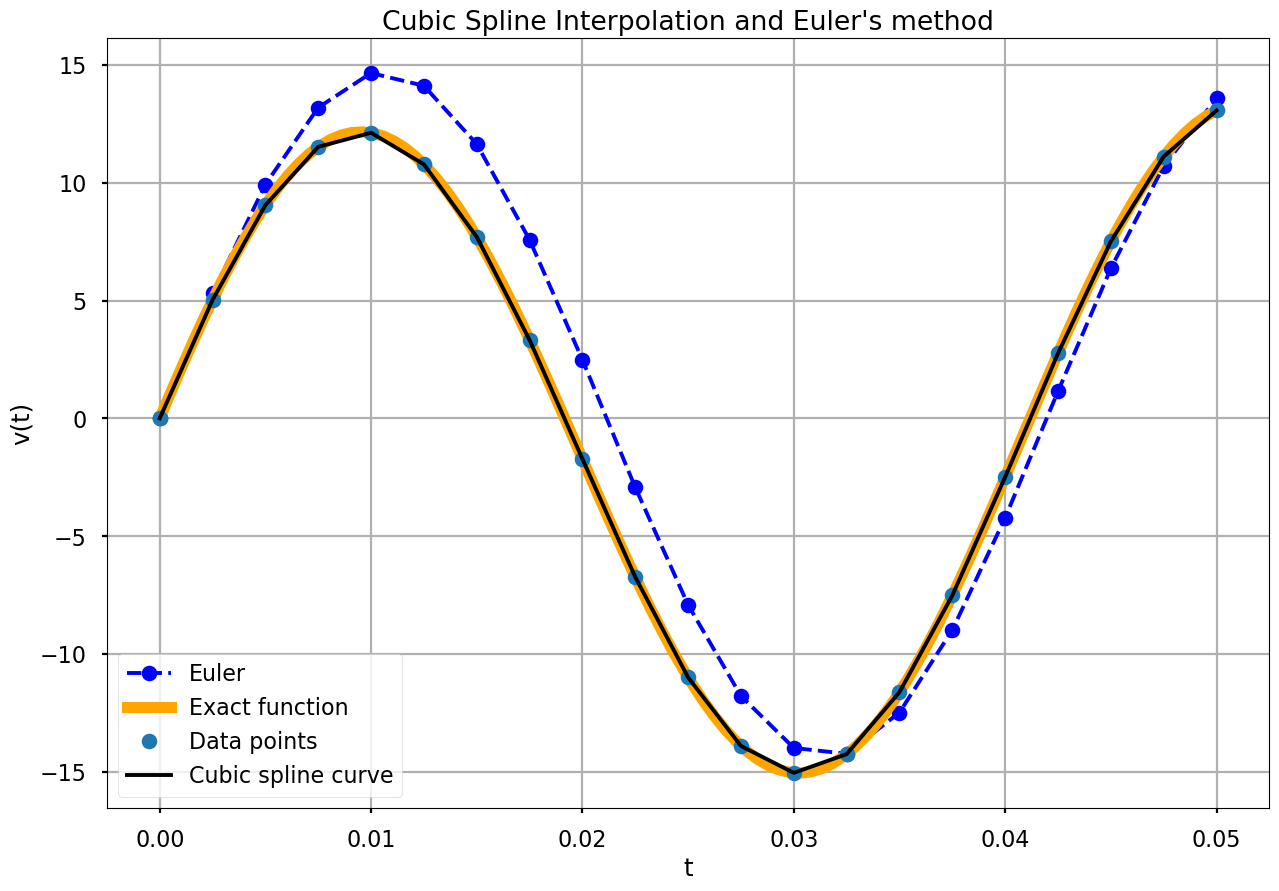

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

t = np.array( [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05])
v = np.array( [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733])

def z(a):
    return ((510/37)*np.sin(150*a))+((85/37)*(np.cos(150*a)-np.exp(-25*a)))

cs = CubicSpline(t, v, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    t_low = t[j]
    t_high = t[j+1]
    
    equation = f'S{j}({t_low}< t<={t_high}) = {a_j:.5f} + {b_j:.5f}(t-{t_low}) + {c_j:.5f}(t-{t_low})^2  + {d_j:.5f}(t-{t_low})^3'
   
    print(equation)

t_plot = np.linspace(t[0], t[-1], 100)

v_exact = ((510/37)*np.sin(150*t_plot))+((85/37)*(np.cos(150*t_plot)-np.exp(-25*t_plot)))


def func( t_euler, v_euler ):
    return (2125*np.cos(150*t_euler))-(25*v_euler)
     

def euler( a0, v_euler, h, t_euler):
    temp = -0
 

    while a0 < t_euler:
        temp = v_euler
        v_euler =v_euler + h * func(a0, v_euler)
        a0 = a0 + h
 

    print("Euler V(0.05)= ","%.5f"% v_euler)
    return v_euler

a0 = 0
b0 = 0
h = 0.0025
 
t_euler = 0.05
 
v_euler = euler(a0, b0, h, t_euler)

error = abs(z(0.05) - v_euler)
print("Error Euler = ", "%.5f" % error)

print('V(0.05)_exact={:.5f}'.format(z(0.05)))
print('V(0.05) Cubic Spline = {:.5f}'.format(cs(0.05)))
print('Error Cubic Spline={:.5f}'.format(abs(z(0.05)-cs(0.05))))

plt.style.use('seaborn-poster')
%matplotlib inline


f = lambda w, s: (2125*np.cos(150*w))-(25*s)
h = 0.0025
w = np.arange(0, 0.05 + h, h) 

s0 = 0

s = np.zeros(len(w))
s[0] = s0

for i in range(0, len(w) - 1):
    s[i + 1] = s[i] + h*f(w[i], s[i])

plt.figure(figsize = (15, 10))
plt.plot(w, s, 'bo--', label='Euler')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.grid()
plt.legend(loc='lower right')
plt.plot(t_plot,v_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(t, v, 'o', label='Data points')
plt.plot(t, cs(t), 'black',label='Cubic spline curve')
plt.legend()
plt.show() 

In [34]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( t_euler, v_euler ):
    return (2125*np.cos(150*t_euler))-(25*v_euler)
     

def euler( a0, v_euler, h, t_euler):
    temp = -0
 

    while a0 < t_euler:
        temp = v_euler
        v_euler =v_euler + h * func(a0, v_euler)
        a0 = a0 + h
 
    return v_euler

a0 = 0
b0 = 0
h = 0.0025
 
t_euler_values = np.arange(0, 0.05+h, h)

t_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []

def z(a):
    return ((510/37)*np.sin(150*a))+((85/37)*(np.cos(150*a)-np.exp(-25*a)))



t = np.array( [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05])
v = np.array( [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733])


cs = CubicSpline(t, v, bc_type='natural')


for i in np.arange(0, 1+h, h):
    error = abs(z(i)-cs(i))

for t in t_euler_values:
    v_euler = euler(a0, b0, h, t)
    error = abs(z(t) - v_euler)
    s = np.round(cs(t), 5)
    error_cs.append(abs(z(t)-s))
    t_values.append(t)
    euler_values.append(float("{:.5f}".format(v_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))



t_values = [float("{:.5f}".format(t)) for t in t_values]
exact_values = [float("{:.5f}".format(t)) for t in exact_values]
euler_values = [float("{:.5f}".format(t)) for t in euler_values]
error_euler = [float("{:.5f}".format(t)) for t in error_euler]
s_values = [float("{:.5f}".format(t)) for t in s_values]

print('{',end='')   
print("'t' : ", t_values,end='')
print(',')

error_eulervalues=[]


for t in t_euler_values:
    exact_values.append(round(z(t),5))
    


print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')



for t_euler in t_euler_values:
    t_values.append(round(t_euler, 5))
    v_euler = euler(a0, b0, h, t_euler)
    erroreuler = abs(z(t_euler) - v_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')



for t in t_euler_values:
    s = np.round(cs(t), 5)
    s_values.append(float("{:.5f}".format(s)))


s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'t' :  [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05],
'Exact' : [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733],
'Euler' :  [0.0, 5.3125, 9.92379, 13.19065, 14.65686, 14.1166, 11.64304, 7.57818, 2.48528, -2.92938, -11.77929, -13.98722, -14.23287, -12.48325, -8.98259, -8.98259, -4.21844, 1.14612, 6.36461, 10.71092, 13.5802],
'Cubic Spline':  [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733],
'Error Euler':  [0.0, 0.28434, 0.87468, 1.66797, 2.53424, 3.33454, 3.94026, 4.25085, 4.2078, 3.80269, 0.78629, 0.08544, 0.81062, 1.7662, 2.63802, 1.46906, 1.72771, 1.61136, 1.14438, 0.39938, 0.5

In [35]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'t' :  [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05],
'Exact' : [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733],
'Euler' :  [0.0, 5.3125, 9.92379, 13.19065, 14.65686, 14.1166, 11.64304, 7.57818, 2.48528, -2.92938, -11.77929, -13.98722, -14.23287, -12.48325, -8.98259, -8.98259, -4.21844, 1.14612, 6.36461, 10.71092, 13.5802],
'Cubic Spline':  [0.0, 5.02816, 9.04911, 11.52268, 12.12262, 10.78206, 7.70278, 3.32733, -1.72252, -6.73207, -10.993, -13.90178, -15.04349, -14.24945, -11.62061, -7.51353, -2.49073, 2.75747, 7.50899, 11.1103, 13.06733],
'Error Euler':  [0.0, 0.28434, 0.87468, 1.66797, 2.53424, 3.33454, 3.94026, 4.25085, 4.2078, 3.80269, 0.78629, 0.08544, 0.81062, 1.7662, 2.63802, 1.46906, 1.72771, 1.61136, 1.14438, 0.39938, 0.51287],
'Error Cubic Spline': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

,t,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.0000,0.00000,0.00000,0.00000,0.00000,0.0
1,0.0025,5.02816,5.31250,5.02816,0.28434,0.0
2,0.0050,9.04911,9.92379,9.04911,0.87468,0.0
3,0.0075,11.52268,13.19065,11.52268,1.66797,0.0
4,0.0100,12.12262,14.65686,12.12262,2.53424,0.0
5,0.0125,10.78206,14.11660,10.78206,3.33454,0.0
6,0.0150,7.70278,11.64304,7.70278,3.94026,0.0
7,0.0175,3.32733,7.57818,3.32733,4.25085,0.0
8,0.0200,-1.72252,2.48528,-1.72252,4.20780,0.0
9,0.0225,-6.73207,-2.92938,-6.73207,3.80269,0.0


In [83]:
#chapter2
import numpy as np

def f(x, y):
    return (np.exp(x))

x0 = 0
h=1
x_span = (x0, 3)

x_values = np.arange(x0, 3+h, h)
print('x=np.array([', end='')
for i in range(len(x_values)):
    if i > 0:
        print(', ', end='')
    print(f'{x_values[i]:.5f}', end='')
print('])')

for x in x_values:
    result = f(x, y)
results = [f(x, y) for x in x_values]
print("y=np.array([{}])".format(', '.join("{:.5f}".format(r) for r in results)))

x=np.array([0.00000, 1.00000, 2.00000, 3.00000])
y=np.array([1.00000, 2.71828, 7.38906, 20.08554])


S0(0.0< x<=1.0) = 1.00000 + 1.46599(x-0.0) + 0.00000(x-0.0)^2  + 0.25229(x-0.0)^3
S1(1.0< x<=2.0) = 2.71828 + 2.22285(x-1.0) + 0.75686(x-1.0)^2  + 1.69107(x-1.0)^3
S2(2.0< x<=3.0) = 7.38906 + 8.80977(x-2.0) + 5.83006(x-2.0)^2  + -1.94335(x-2.0)^3
Eulur y(1.25)=  6.71828
Error Euler =  3.22794
y(x)_exact=3.49034
S(1.25) = 3.34772
Error Cubic Spline=0.14262


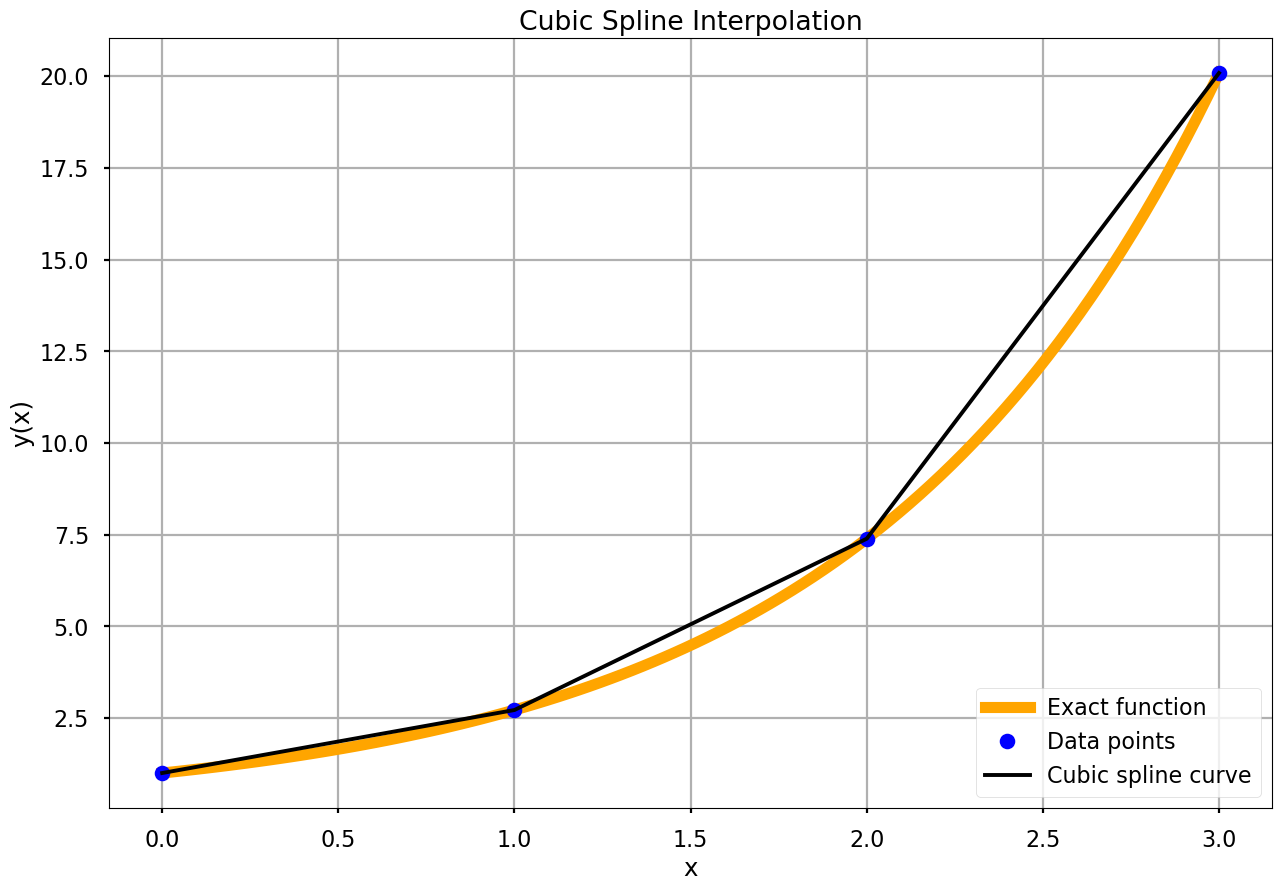

In [36]:
#chapter2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x=np.array([0.00000, 1.00000, 2.00000, 3.00000])
y=np.array([1.00000, 2.71828, 7.38906, 20.08554])

def z(a):
    return (np.exp(a))

cs = CubicSpline(x, y, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    x_low = x[j]
    x_high = x[j+1]
    
    equation = f'S{j}({x_low}< x<={x_high}) = {a_j:.5f} + {b_j:.5f}(x-{x_low}) + {c_j:.5f}(x-{x_low})^2  + {d_j:.5f}(x-{x_low})^3'
   
    print(equation)

x_plot = np.linspace(x[0], x[-1], 100)

y_exact = (np.exp(x_plot))


def func( x_euler, y_euler ):
    return (np.exp( x_euler)+1)
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    print("Eulur y(1.25)= ","%.5f"% y_euler)
    return y_euler

a0 = 0
b0 = 1
h = 1
 
x_euler = 1.25
 
y_euler = euler(a0, b0, h, x_euler)

error = abs(z(1.25) - y_euler)
print("Error Euler = ", "%.5f" % error)

print('y(x)_exact={:.5f}'.format(z(1.25)))
print('S(1.25) = {:.5f}'.format(cs(1.25)))
print('Error Cubic Spline={:.5f}'.format(abs(z(1.25)-cs(1.25))))

plt.style.use('seaborn-poster')
%matplotlib inline


f = lambda t, s: np.exp(t)+1
h = 1
t = np.arange(0, 3 + h, h) 

s0 = 1 

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (15, 10))
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.plot(x_plot,y_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(x, y, 'bo', label='Data points')
plt.plot(x, cs(x), 'black',label='Cubic spline curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
#Q&A

In [ ]:
#Q&A

In [ ]:
#Q&A

In [ ]:
#Q&A

In [ ]:
import numpy as np

x0=#Q&A
h=#Q&A
x_values = np.arange(x0, #Q&A+h, h)
x = [round(i,5) for i in x_values.tolist()]

#np.array(x)
y=#Q&A
y_rounded = np.round(y, 5)
y = y_rounded.tolist()

print("x = np.array(",x,end='')
print(')')
print("y = np.array(",y,end='')
print(')')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = #Q&A
y = #Q&A
def z(a):
    return #Q&A

cs = CubicSpline(x, y, bc_type='natural')


for j in range(cs.c.shape[1]):
    a_j = cs.c.item(3, j)
    b_j = cs.c.item(2, j)
    c_j = cs.c.item(1, j)
    d_j = cs.c.item(0, j)
    x_low = x[j]
    x_high = x[j+1]
    
    equation = f'S{j}({x_low}< x<={x_high}) = {a_j:.5f} + {b_j:.5f}(x-{x_low}) + {c_j:.5f}(x-{x_low})^2  + {d_j:.5f}(x-{x_low})^3'
   
    print(equation)

x_plot = np.linspace(x[0], x[-1], 100)

y_exact = #Q&A

def func( x_euler, y_euler ):
    return #Q&A
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    print("Euler y(#Q&A)= ","%.5f"% y_euler)
    return y_euler

a0 = #Q&A
b0 = #Q&A
h = #Q&A
 
x_euler = #Q&A
 
y_euler = euler(a0, b0, h, x_euler)

error = abs(z(#Q&A) - y_euler)
print("Error Euler = ", "%.5f" % error)

print('y(x)_exact={:.5f}'.format(z(#Q&A)))
print('S(1) = {:.5f}'.format(cs(#Q&A)))
print('Error Cubic Spline={:.5f}'.format(abs(z(#Q&A)-cs(#Q&A))))

plt.style.use('seaborn-poster')
%matplotlib inline


f = lambda t, s: #Q&A
h = 0.05 
t = np.arange(0, #Q&A + h, h) 

s0 = 1#Q&A

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (15, 10))
plt.plot(t, s, 'bo--', label='Euler')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.plot(x_plot,y_exact, 'orange', linewidth=8, label='Exact function')
plt.plot(x, y, 'o', label='Data points')
plt.plot(x, cs(x), 'black',label='Cubic spline curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline

def func( x_euler, y_euler ):
    return #Q&A
     

def euler( a0, y_euler, h, x_euler ):
    temp = -0
 

    while a0 < x_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h
 

    return y_euler

a0 = #Q&A
b0 = #Q&A
h = #Q&A
 
x_euler_values = np.arange(0, #Q&A+h, h)

x_values = []
euler_values = []
error_values = []

x_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []

def z(a):
    return #Q&A

for x in x_euler_values:
    exact_values.append(round(z(x),5))
for x_euler in x_euler_values:
    x_values.append(round(x_euler, 5))
    y_euler = euler(a0, b0, h, x_euler)
    error = abs(z(x_euler) - y_euler)
    euler_values.append(round(y_euler, 5))
    error_values.append(round(error, 5))
print('{',end='')   
print("'x' : ", x_values,end='')
print(',')
print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Error Euler': ", error_values,end='')
print(',')


x = #Q&A
y = #Q&A


cs = CubicSpline(x, y, bc_type='natural')
h=0.05
S_values = []
error_values = []

for i in np.arange(0, #Q&A+h, h):
    
    error = abs(z(i)-cs(i))
    error_values.append("{:.8f}".format(error).strip())

for x in x_euler_values:
    y_euler = euler(a0, b0, h, x)
    error = abs(z(x) - y_euler)
    s = np.round(cs(x), 5)
    error_cs.append(abs(z(x)-s))
    x_values.append(x)
    euler_values.append(float("{:.5f}".format(y_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))
    error_cs.append(float("{:.5f}".format(error_cs[-1])))

x_values = [float("{:.5f}".format(x)) for x in x_values]
exact_values = [float("{:.5f}".format(x)) for x in exact_values]
euler_values = [float("{:.5f}".format(x)) for x in euler_values]
error_euler = [float("{:.5f}".format(x)) for x in error_euler]
s_values = [float("{:.5f}".format(x)) for x in s_values]
error_cs = [float("{:.5f}".format(x)) for x in error_cs]

print("'Cubic Spline': ", s_values,end='')
print(',')
print("'Error Cubic Spline':", str(error_values).replace("'", ""),end='')
print('}')

In [ ]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {#Q&A}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)